In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# df- dataframe pf stock prices
df = pd.read_csv('APPL.csv', index_col = 'Date')
df.head()

,Low,High,Close,Open
Date,,,,
1999-11-01,77.37,80.69,77.62,80.00
1999-11-02,77.31,81.69,80.25,78.00
1999-11-03,81.00,83.25,81.50,81.62
1999-11-04,80.62,85.37,83.62,82.06
1999-11-05,84.00,88.37,88.31,84.62


In [3]:
df.shape

(5454, 4)

<Axes: xlabel='Date'>

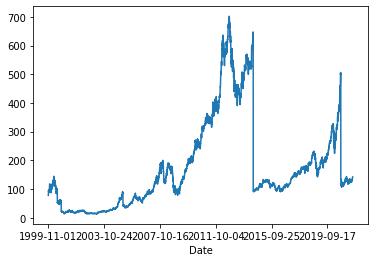

In [4]:
df['Close'].plot()

In [5]:
df.isnull().values.any()

False

In [6]:
df.describe()

,Low,High,Close,Open
count,5454.000000,5454.000000,5454.000000,5454.000000
mean,172.681087,176.702928,174.747033,174.761299
std,156.094862,158.912581,157.542041,157.608887
min,12.720000,13.190000,13.120000,12.990000
25%,62.885000,65.000000,63.885000,64.207500
50%,122.240000,126.030000,124.390000,124.145000
75%,213.227500,219.420000,215.887500,216.290000
max,699.570000,705.070000,702.100000,702.410000


### feature engineering

In [56]:
# Feature engineering: adding moving averages
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df

,Low,High,Close,Open,MA5,MA10,MA20
Date,,,,,,,
1999-11-01,77.370,80.69,77.62,80.00,NaN,NaN,NaN
1999-11-02,77.310,81.69,80.25,78.00,NaN,NaN,NaN
1999-11-03,81.000,83.25,81.50,81.62,NaN,NaN,NaN
1999-11-04,80.620,85.37,83.62,82.06,NaN,NaN,NaN
1999-11-05,84.000,88.37,88.31,84.62,82.260,NaN,NaN
...,...,...,...,...,...,...,...
2021-06-29,134.350,136.49,136.33,134.80,134.266,133.001,129.8925
2021-06-30,135.870,137.41,136.96,136.17,134.918,133.682,130.4875
2021-07-01,135.760,137.33,137.27,136.60,135.690,134.230,131.1740


In [57]:
# Drop NaN values
df = df.dropna()
df

,Low,High,Close,Open,MA5,MA10,MA20
Date,,,,,,,
1999-11-29,93.250,99.75,94.56,94.25,93.548,92.068,89.6140
1999-11-30,97.370,103.75,97.87,98.12,94.998,92.911,90.6265
1999-12-01,100.060,104.50,103.06,101.00,97.048,94.098,91.7670
1999-12-02,101.750,110.62,110.19,103.12,100.148,96.092,93.2015
1999-12-03,111.870,115.56,115.00,112.19,104.136,98.630,94.7705
...,...,...,...,...,...,...,...
2021-06-29,134.350,136.49,136.33,134.80,134.266,133.001,129.8925
2021-06-30,135.870,137.41,136.96,136.17,134.918,133.682,130.4875
2021-07-01,135.760,137.33,137.27,136.60,135.690,134.230,131.1740


### seperate input and output variables

In [58]:
# output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = df[['Open', 'High', 'Low', 'MA5', 'MA10', 'MA20']]
target = df[['Close']]

In [60]:
# df.iloc[:, 0:1]

In [9]:
# train_set = df.iloc[:, 0:1].values

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

scaled_features

array([[0.11786719, 0.1251084 , 0.1172454 , 0.1167981 , 0.11614013,
        0.11363931],
       [0.12348061, 0.13088975, 0.12324379, 0.118908  , 0.11738397,
        0.11515738],
       [0.12765803, 0.13197375, 0.12716022, 0.12189096, 0.11913538,
        0.11686736],
       ...,
       [0.17929564, 0.17942418, 0.17913664, 0.178119  , 0.17834968,
        0.17595138],
       [0.18118128, 0.18328323, 0.18202664, 0.18011249, 0.1797514 ,
        0.17700616],
       [0.18432886, 0.18783604, 0.18541166, 0.18221947, 0.18118557,
        0.17821462]])

In [62]:
scaled_target

array([[0.11820372],
       [0.12300792],
       [0.1305408 ],
       ...,
       [0.18019391],
       [0.18409823],
       [0.18708816]])

In [63]:
# create sequences

def create_sequences(features, target, time_steps=60):
    Xs, ys = [], []
    #Xs will store the sequences of feature data.
    for i in range(len(features) - time_steps):
        Xs.append(features[i:i+time_steps])
        ys.append(target[i+time_steps])
    return np.array(Xs), np.array(ys)
                

# X[i:i+time_steps] creates a sequence of time_steps length from the feature data.
# y.iloc[i+time_steps] gets the target value corresponding to the end of the sequence. 
# The sequence and the target value are appended to Xs and ys, respectively.

In [64]:
time_steps=60
# X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
# X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

X, y = create_sequences(scaled_features, scaled_target, time_steps)

In [65]:
X.shape

(5375, 60, 6)

### train and test set

In [67]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [68]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4300, 60, 6)
X_test shape: (1075, 60, 6)
y_train shape: (4300, 1)
y_test shape: (1075, 1)


In [69]:
y_train

array([[0.17882957],
       [0.68888792],
       [0.53942059],
       ...,
       [0.16151412],
       [0.15907574],
       [0.01039217]])

In [72]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            11400     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,651
Trainable params: 31,651
Non-trainable params: 0
_________________________________________________________________


In [74]:
import timeit

start = timeit.default_timer()

print("whatcndgh")
stop = timeit.default_timer()

print('Time: ', stop - start)  

whatcndgh
Time:  0.0012422999998307205


In [75]:
import timeit
start = timeit.default_timer()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Epoch 1/100
121/121 [==============================] - 12s 96ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 2/100
121/121 [==============================] - 11s 94ms/step - loss: 0.0024 - val_loss: 6.2104e-04
Epoch 3/100
121/121 [==============================] - 11s 94ms/step - loss: 0.0018 - val_loss: 5.8320e-04
Epoch 4/100
121/121 [==============================] - 8s 66ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 5/100
121/121 [==============================] - 10s 81ms/step - loss: 0.0018 - val_loss: 4.4354e-04
Epoch 6/100
121/121 [==============================] - 8s 69ms/step - loss: 0.0017 - val_loss: 4.5446e-04
Epoch 7/100
121/121 [==============================] - 9s 75ms/step - loss: 0.0017 - val_loss: 3.6666e-04
Epoch 8/100
121/121 [==============================] - 10s 80ms/step - loss: 0.0016 - val_loss: 5.0019e-04
Epoch 9/100
121/121 [==============================] - 10s 81ms/step - loss: 0.0014 - val_loss: 3.3534e-04
Epoch 10/100
121/121 [==========================

121/121 [==============================] - 9s 77ms/step - loss: 9.8846e-04 - val_loss: 2.7978e-04
Epoch 77/100
121/121 [==============================] - 8s 68ms/step - loss: 9.9215e-04 - val_loss: 1.5165e-04
Epoch 78/100
121/121 [==============================] - 10s 81ms/step - loss: 8.9983e-04 - val_loss: 1.6096e-04
Epoch 79/100
121/121 [==============================] - 10s 81ms/step - loss: 8.1257e-04 - val_loss: 3.4615e-04
Epoch 80/100
121/121 [==============================] - 8s 69ms/step - loss: 9.4023e-04 - val_loss: 1.2297e-04
Epoch 81/100
121/121 [==============================] - 8s 69ms/step - loss: 9.2479e-04 - val_loss: 3.0823e-04
Epoch 82/100
121/121 [==============================] - 10s 81ms/step - loss: 8.4937e-04 - val_loss: 1.3576e-04
Epoch 83/100
121/121 [==============================] - 9s 76ms/step - loss: 0.0011 - val_loss: 1.2252e-04
Epoch 84/100
121/121 [==============================] - 10s 80ms/step - loss: 9.6729e-04 - val_loss: 8.5201e-05
Epoch 85/100
1

In [76]:
loss = model.evaluate(X_test, y_test)
loss

34/34 [==============================] - 1s 24ms/step - loss: 3.8921e-04


0.0003892092499881983

In [77]:
y_pred = model.predict(X_test)

34/34 [==============================] - 2s 32ms/step


In [78]:
y_test_scaled = scaler.inverse_transform(y_test)
y_pred_scaled = scaler.inverse_transform(y_pred)

### model

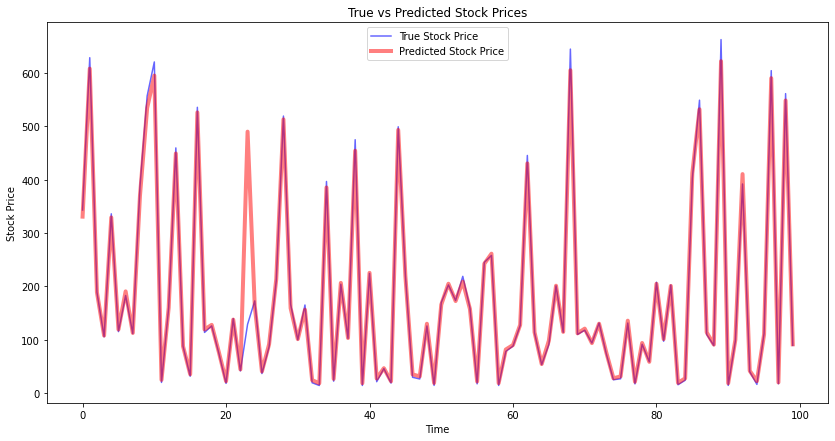

In [79]:
# Plotting true vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled[-100:], color='blue', label='True Stock Price', alpha=0.6)
plt.plot(y_pred_scaled[-100:], color='red', linewidth=4, label='Predicted Stock Price', alpha=0.5)
plt.title('True vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

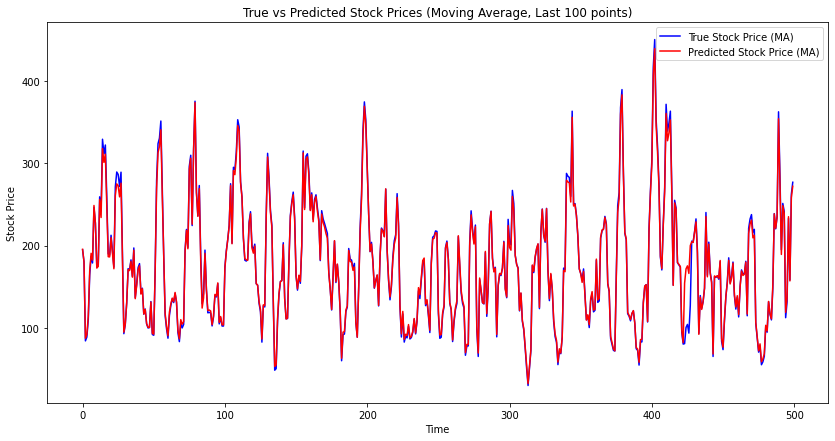

Mean Absolute Error (MAE): 5.3109


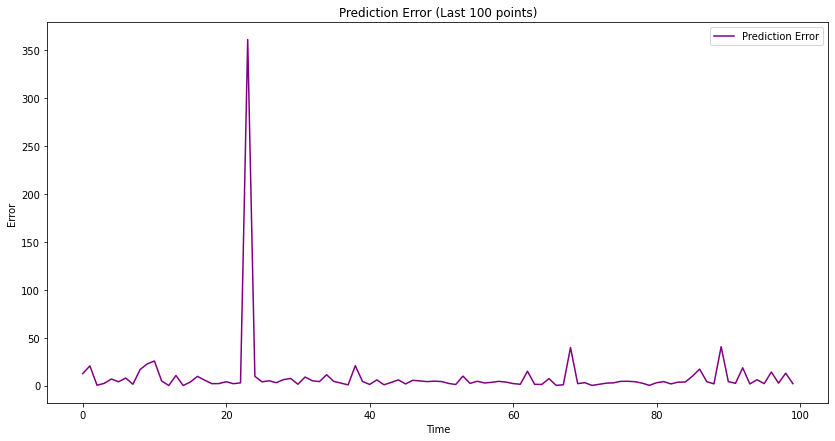

In [80]:
# Calculate and plot moving averages to smooth the curves
def moving_average(data, window_size=5):
    return np.convolve(data.flatten(), np.ones(window_size)/window_size, mode='valid')

y_test_ma = moving_average(y_test_scaled, window_size=5)
y_pred_ma = moving_average(y_pred_scaled, window_size=5)

plt.figure(figsize=(14, 7))
plt.plot(y_test_ma[-500:], color='blue', label='True Stock Price (MA)')
plt.plot(y_pred_ma[-500:], color='red', label='Predicted Stock Price (MA)')
plt.title('True vs Predicted Stock Prices (Moving Average, Last 100 points)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test_scaled - y_pred_scaled))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plotting the error
errors = np.abs(y_test_scaled - y_pred_scaled)
plt.figure(figsize=(14, 7))
plt.plot(errors[-100:], color='purple', label='Prediction Error')
plt.title('Prediction Error (Last 100 points)')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()